# Matthew Kearney - HW7 CS 559

In [219]:
import numpy as np
import pandas as pd

raw_data = []
with open('hw7_data.txt') as f:
    raw_data = [line.split() for line in f.readlines()]

X = np.array([[float(x), float(y)] for [x, y] in raw_data])
m, n = X.shape
DF = pd.DataFrame(X)
DF.describe()

,0,1
count,1250.000000,1250.000000
mean,-0.135810,-0.018134
std,2.848773,2.860418
min,-5.846103,-5.854869
25%,-2.822421,-2.763320
50%,-0.029687,0.014414
75%,2.577365,2.674518
max,5.453524,5.600143


#### b. [5 pts] By visualizing the data, guess the number of clusters. Justify your answer

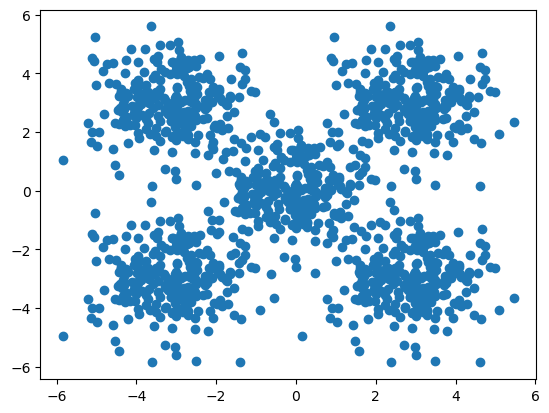

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()



Based on the above scatter plot, it would be fair to predict 5 clusters. Not only are there clearly 5 distinct clusters, but there are 1250 observations meaning each cluster *should* have 250 points. We will use these assumptions later in determining error and accuracy. 

####  c. [15 pts] In the Kmean implementation (KMeans im- do not confuse with Scikit-learn Kmeans), points get clustered by the initial k value the user gives to. However, it does not provide stability (e.g., the optimized total within-cluster variance or inertia). Modify the given algorithm to return the within-cluster variance. Then, visualize how the within-cluster converges as k changes from 1 to 15. Explain which k value is the most appropriate and justify your answer.

In [221]:
import random

def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans_im:

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X_train):

        # Initialize the centroids
        
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
            
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)


            #calculate within-cluster variance`
            cov = []
            for i, cent in enumerate(self.centroids):
                cluster_points = np.array(sorted_points[i])
                if len(cluster_points) > 0:
                    cov.append(np.sum((cluster_points - cent) ** 2) / len(cluster_points))
                else:
                    cov.append(0)  # If a cluster is empty, variance is 0

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1


        return cov

k = 1: W(Ck) = [16.28445754882529]
k = 2: W(Ck) = [9.829833875437982, 9.696679556356845]
k = 3: W(Ck) = [2.7484150625960515, 9.525507482587685, 3.408973738120071]
k = 4: W(Ck) = [4.251695427432736, 2.2990429080962302, 2.3279710474667437, 3.593842611161718]
k = 5: W(Ck) = [1.652375020089125, 1.8010779012484839, 1.8518424244627478, 1.7240273754623683, 1.9292451895476592]
k = 6: W(Ck) = [1.501659282475506, 1.8010779012484839, 1.8518424244627478, 1.3261623101305489, 1.9172294244629602, 1.291893560672716]


c:\Users\mkear\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mkear\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


k = 7: W(Ck) = [1.6170476035561643, 1.8149823206686222, 1.0845545006237598, 1.438178066055841, 1.1565452426111102, 1.3385884654872253, 1.7745375654630728]
k = 8: W(Ck) = [1.6339300334873992, 1.3970565066249534, 1.2035954262880333, 1.3446789925631397, 1.2588094951012754, 1.3238549722794648, 1.4594996741513626, 1.4264462392122788]
k = 9: W(Ck) = [1.9172294244629602, 0.8224322609491127, 1.2523232273244367, 1.1329939766616124, 1.2379871407770415, 1.2691555086172248, 1.094051442786154, 1.3832011048348583, 1.2250120966883473]
k = 10: W(Ck) = [1.6719455094815583, 1.0201643314275697, 1.1928410860150627, 0.8938368249737463, 0.9286539834126515, 1.3229177893023023, 0.760047160617609, 1.2424472170821133, 1.52176032507462, 1.3098552407973663]
k = 11: W(Ck) = [1.2645194858606748, 1.227910495437413, 0.8933434883531919, 1.0215395603854045, 1.2456120910151052, 0.9779194098797487, 1.2544331577459669, 0.8322300613022066, 0.8703065340324185, 1.2652227832592564, 1.0757000021419545]
k = 12: W(Ck) = [1.27730

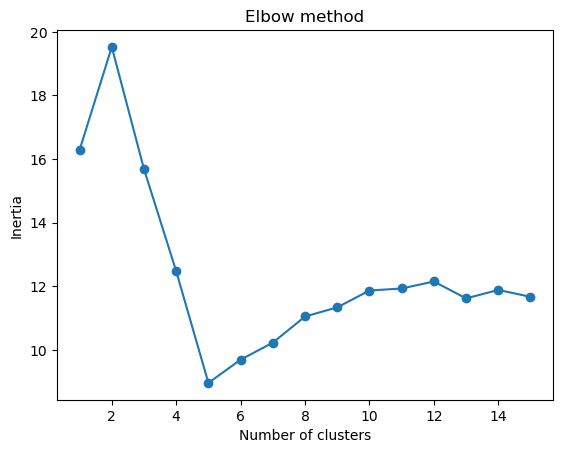

In [222]:
# Fit centroids to dataset
within_class = []
centers = range(1,16)
for i in centers:
    kmeans = KMeans_im(n_clusters=i)
    val = kmeans.fit(X)   
    print(f"k = {i}: W(Ck) = {val}")
    within_class.append(val)
    

def inertias_scalar(inertia):
    vals = []
    for i in inertia:
        if type(i)==list:
            vals.append(np.sum(i))
        else: 
            vals.append(i)
    return vals


        
plt.plot(centers, inertias_scalar(within_class), marker='o')

plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the above elbow method graph, we can be sure that the optimal number of cluster is at k = 5. K increases from 1 to 2, and then decreases steadily from 2 to 5. When x is at 5, we reach the 'elbow' where the y-values thereafter begin getting higher and higher. Thus, we can say that the optimal number of clusters is at the elbow and after the most significant decrease(s) at k =5.

#### d. [15 pts] Run the train gmm algorithm (the implemented Gaussian Mixture algorithm) to check if the k value answered in (c.) is a good choice. Visualize the change of log-likelihood as k increases from 1 to 15. Then, compare the visualization of clusters with KMeans results from (c.). Explain how results are similar and different.

In [223]:
from sklearn.preprocessing import MinMaxScaler
def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters, n_init=100).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'pi_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters


def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
    
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)




def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    likelihood = np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)* np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)
    return likelihood

def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
        # if(i == 49):
        #     print('\tEpoch: ', i + 1, 'Likelihood: ', likelihood)

    scores = np.log(gamma_nk)
    
    return clusters, likelihoods, scores, sample_likelihoods, history


centers = range(1,16) # n_clusters = 5
gmm_likelys = []
X_scaled = MinMaxScaler().fit_transform(X)
for k in centers: 
    # print("k:\n")
    clusters, likelihoods, _, _, _ = train_gmm(X_scaled, k, n_epochs=50)
    gmm_likelys.append(likelihoods[-1])

    # Plot log-likelihood as a function of k for GMM
plt.plot(centers, gmm_likelys, marker='o', label='GMM')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood for Gaussian Mixture Model')
plt.xticks(centers)
plt.legend()
plt.show()

# n_epochs = 50


# clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(X, n_clusters, n_epochs)


The suggested k-value from the above